# Notebook summary

# Define file path

In [2]:
import pandas as pd
import os
import csv

# Define input and output file paths
path = os.path.join(os.path.dirname(os.getcwd()))
path='/Users/ayla/workflow'
ipath = os.path.join(path,'data')
opath = os.path.join(path,'data')
input_file_dir=os.path.join(ipath)
output_file_dir=os.path.join(opath)

# Data processing

Create four new csv files, one for each BG class (remains OBC, becomes OBC, etc.) that will be used to analyze the data by class

In [3]:
#create 4 seperate csv files, one for each BG class
import pandas as pd
import os

# Define input file path (output of the previous script)
input_file_name = 'numerical_designation_percent_low_income_MG.csv'
input_csv = f"{ipath}/{input_file_name}"

# Read the input file
try:
    data = pd.read_csv(input_csv)

    # Loop through each designation and create separate CSV files
    for designation in range(1, 5):
        designation_data = data[data['Designation Change'] == designation]
        output_file_name = f'designation_{designation}_data.csv'
        output_csv = f"{opath}/{output_file_name}"
        
        # Write the filtered data to the new CSV file
        designation_data.to_csv(output_csv, index=False)
        
        print(f"Data for designation {designation} written to {output_csv}")

except FileNotFoundError as e:
    print(f"File not found: {e}")
except pd.errors.EmptyDataError as e:
    print(f"No data: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Data for designation 1 written to /Users/ayla/workflow/data/designation_1_data.csv
Data for designation 2 written to /Users/ayla/workflow/data/designation_2_data.csv
Data for designation 3 written to /Users/ayla/workflow/data/designation_3_data.csv
Data for designation 4 written to /Users/ayla/workflow/data/designation_4_data.csv


As a reminder:

Designation 1: Remains non-OBC

Designation 2: Remains OBC

Designation 3: Becomes OBC

Designation 4: Becomes non-OBC

# Plotting

Plot designation 1: Remains non-OBC

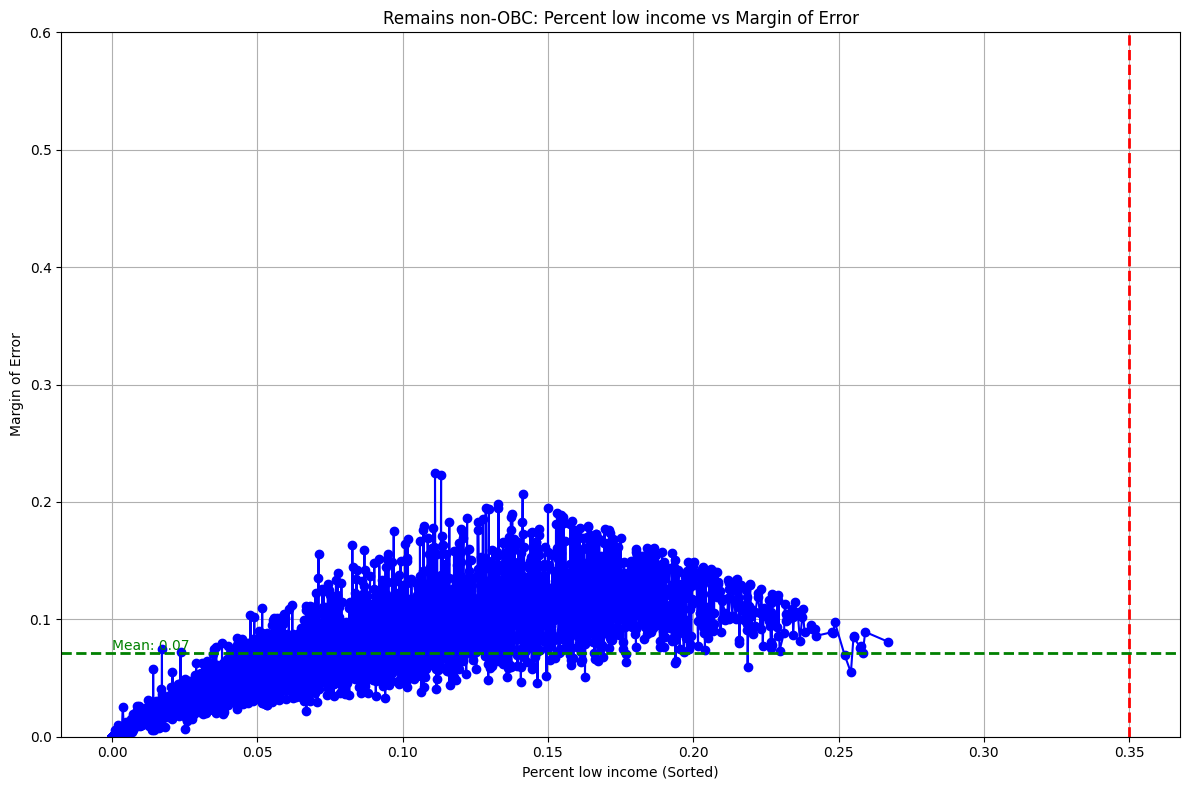

In [36]:
# plot low-income percent on the x-axis (least to greatest) and MOE on the y axis
import pandas as pd
import matplotlib.pyplot as plt

#Define input file path
input_file = 'designation_1_data.csv'
input_csv_file = f'{ipath}/{input_file}'

# Step 1: Load the CSV data
data = pd.read_csv(input_csv_file)

# Step 2: Sort by Inverse Percent from least to greatest
data_sorted = data.sort_values(by='Percent low income')

# Step 3: Plotting
plt.figure(figsize=(12, 8))
plt.plot(data_sorted['Percent low income'], data_sorted['Margin of Error'], marker='o', linestyle='-', color='b')
plt.xlabel('Percent low income (Sorted)')
plt.ylabel('Margin of Error')

# Label title by block group class
plt.title('Remains non-OBC: Percent low income vs Margin of Error')
plt.grid(True)

plt.ylim(0, 0.6)

#mark 35% threshhold
plt.axvline(x=0.35, color='red', linestyle='--', linewidth=2)
plt.tight_layout()

# Calculate the median and mean of the Margin of Error
mean_moe = data_sorted['Margin of Error'].median()

# Add horizontal lines for median and mean
plt.axhline(y=mean_moe, color='green', linestyle='--', linewidth=2, label=f'Mean MOE: {mean_moe:.2f}')

# Annotate the median and mean lines on the y-axis
plt.text(x=0, y=mean_moe, s=f'Mean: {mean_moe:.2f}', color='green', verticalalignment='bottom')

# Show the plot
plt.show()

Plot designation 2: Remains OBC

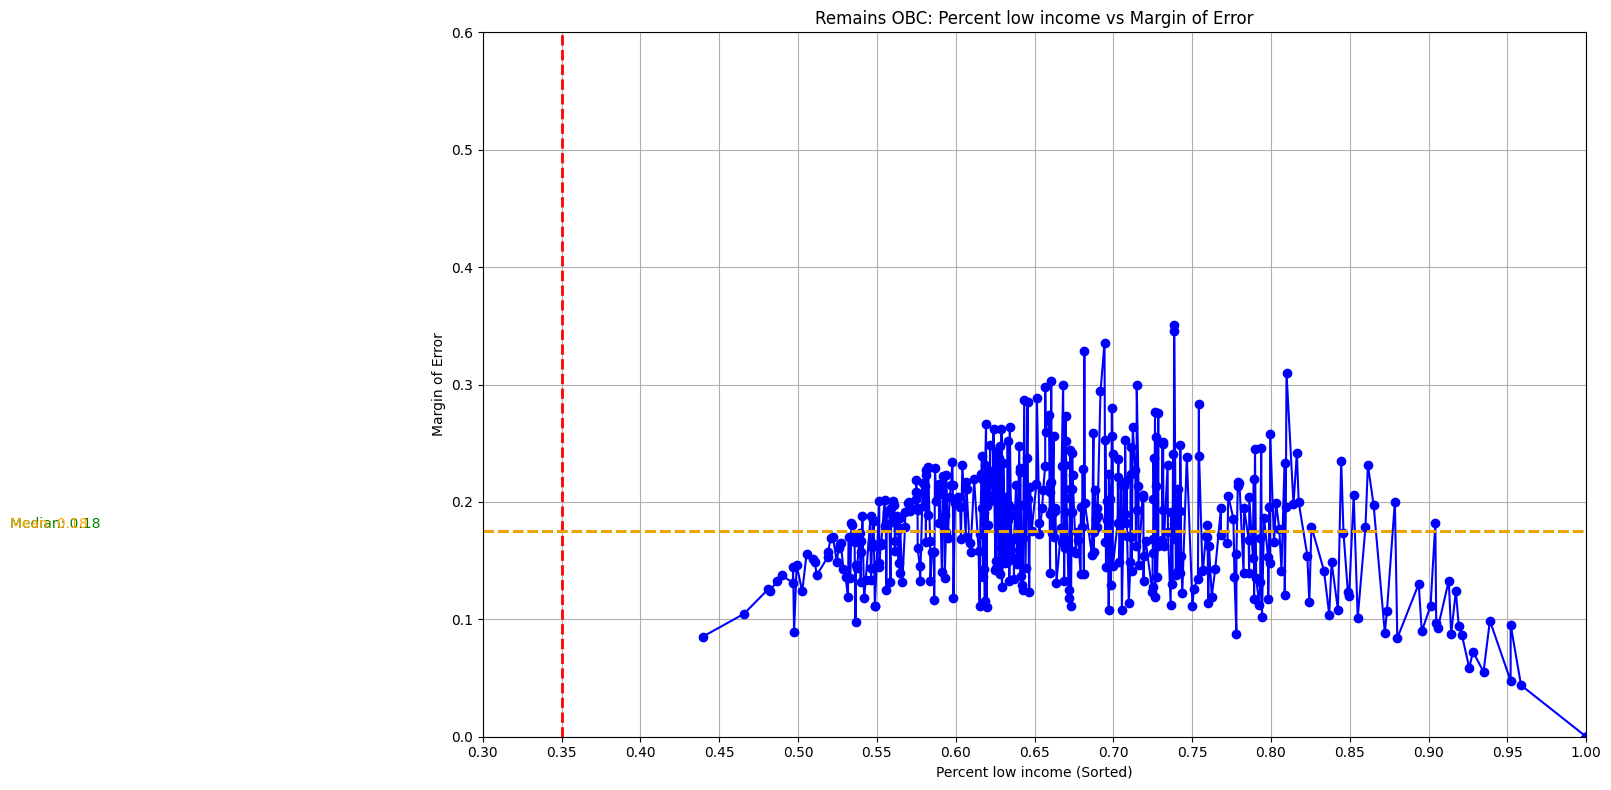

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define input file path
input_file = 'designation_2_data.csv'
input_csv_file = f'{ipath}/{input_file}'

# Step 1: Load the CSV data
data = pd.read_csv(input_csv_file)

# Step 2: Sort by Percent low income from least to greatest
data_sorted = data.sort_values(by='Percent low income')

# Step 3: Plotting
plt.figure(figsize=(12, 8))
plt.plot(data_sorted['Percent low income'], data_sorted['Margin of Error'], marker='o', linestyle='-', color='b')
plt.xlabel('Percent low income (Sorted)')
plt.ylabel('Margin of Error')

# Label title by block group class
plt.title('Remains OBC: Percent low income vs Margin of Error')
plt.grid(True)

# Set axis limits
plt.ylim(0, 0.6)

# Set x-axis limits and ticks with increments of 0.05
plt.xlim(0.3, data_sorted['Percent low income'].max())
plt.xticks(np.arange(0.3, data_sorted['Percent low income'].max() + 0.05, 0.05))

# Mark 35% threshold
plt.axvline(x=0.35, color='red', linestyle='--', linewidth=2)
plt.tight_layout()

# Calculate the median and mean of the Margin of Error
median_moe = data_sorted['Margin of Error'].median()
mean_moe = data_sorted['Margin of Error'].mean()

# Add horizontal lines for median and mean
plt.axhline(y=median_moe, color='green', linestyle='--', linewidth=2, label=f'Median MOE: {median_moe:.2f}')
plt.axhline(y=mean_moe, color='orange', linestyle='--', linewidth=2, label=f'Mean MOE: {mean_moe:.2f}')

# Annotate the median and mean lines on the y-axis
plt.text(x=0, y=median_moe, s=f'Median: {median_moe:.2f}', color='green', verticalalignment='bottom')
plt.text(x=0, y=mean_moe, s=f'Mean: {mean_moe:.2f}', color='orange', verticalalignment='bottom')

# Show the plot
plt.show()


Plot designation 3: Becomes OBC

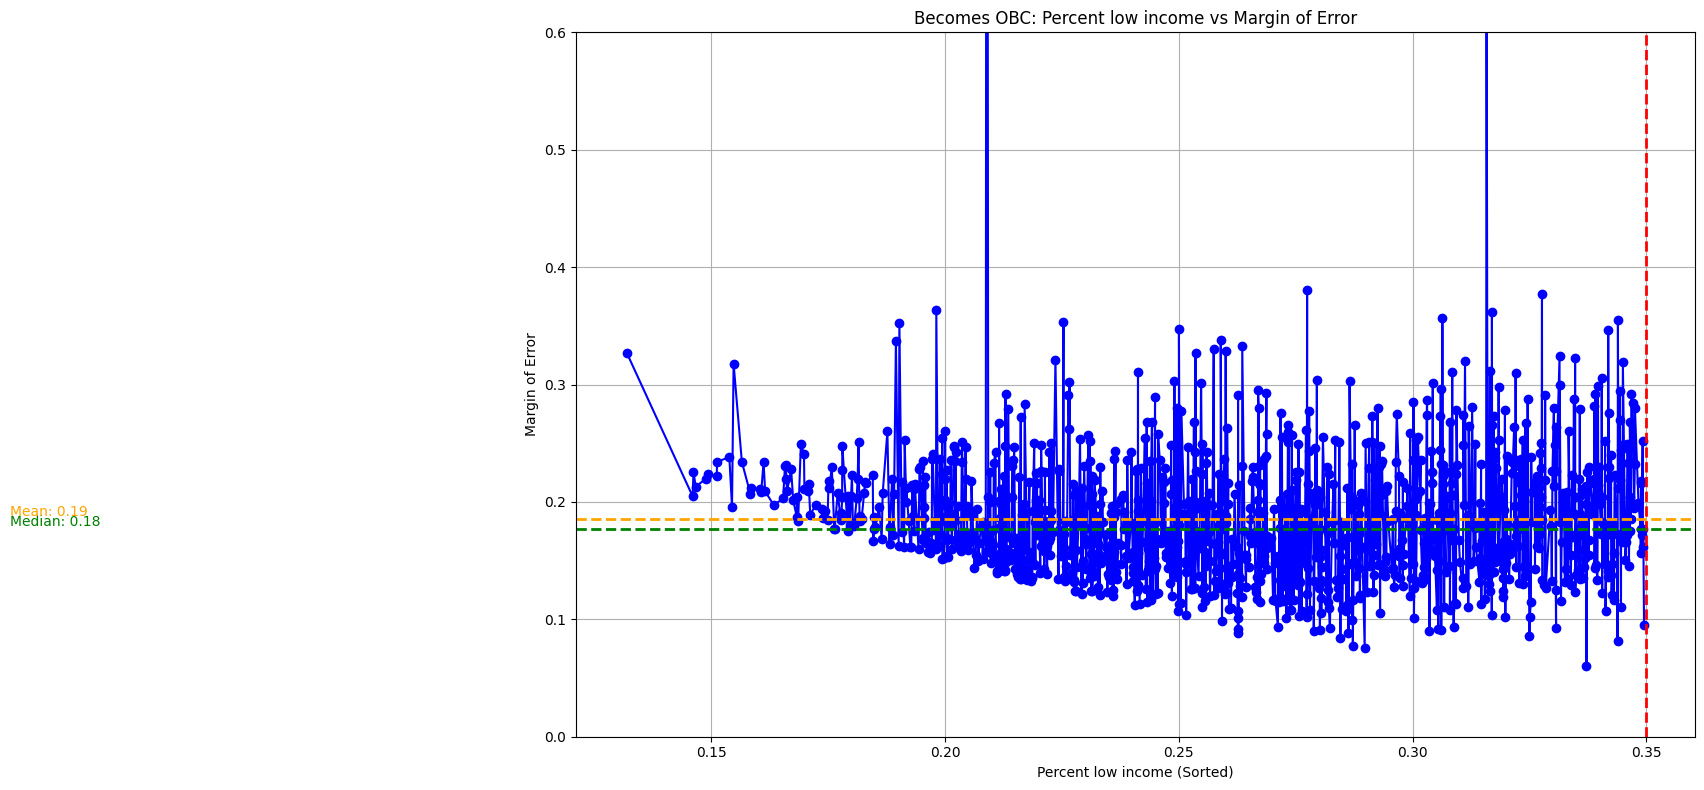

In [37]:
# plot low-income percent on the x-axis (least to greatest) and MOE on the y axis
import pandas as pd
import matplotlib.pyplot as plt

#Define input file path
input_file = 'designation_3_data.csv'
input_csv_file = f'{ipath}/{input_file}'

# Step 1: Load the CSV data
data = pd.read_csv(input_csv_file)

# Step 2: Sort by Inverse Percent from least to greatest
data_sorted = data.sort_values(by='Percent low income')

# Step 3: Plotting
plt.figure(figsize=(12, 8))
plt.plot(data_sorted['Percent low income'], data_sorted['Margin of Error'], marker='o', linestyle='-', color='b')
plt.xlabel('Percent low income (Sorted)')
plt.ylabel('Margin of Error')

# Label title by block group class
plt.title('Becomes OBC: Percent low income vs Margin of Error')
plt.grid(True)

plt.ylim(0, 0.6)

#mark 35% threshhold
plt.axvline(x=0.35, color='red', linestyle='--', linewidth=2)
plt.tight_layout()

# Calculate the median and mean of the Margin of Error
median_moe = data_sorted['Margin of Error'].median()
mean_moe = data_sorted['Margin of Error'].mean()

# Add horizontal lines for median and mean
plt.axhline(y=median_moe, color='green', linestyle='--', linewidth=2, label=f'Median MOE: {median_moe:.2f}')
plt.axhline(y=mean_moe, color='orange', linestyle='--', linewidth=2, label=f'Mean MOE: {mean_moe:.2f}')

# Annotate the median and mean lines on the y-axis
plt.text(x=0, y=median_moe, s=f'Median: {median_moe:.2f}', color='green', verticalalignment='bottom')
plt.text(x=0, y=mean_moe, s=f'Mean: {mean_moe:.2f}', color='orange', verticalalignment='bottom')

# Show the plot
plt.show()

Plot designation 3 again but with upper bound

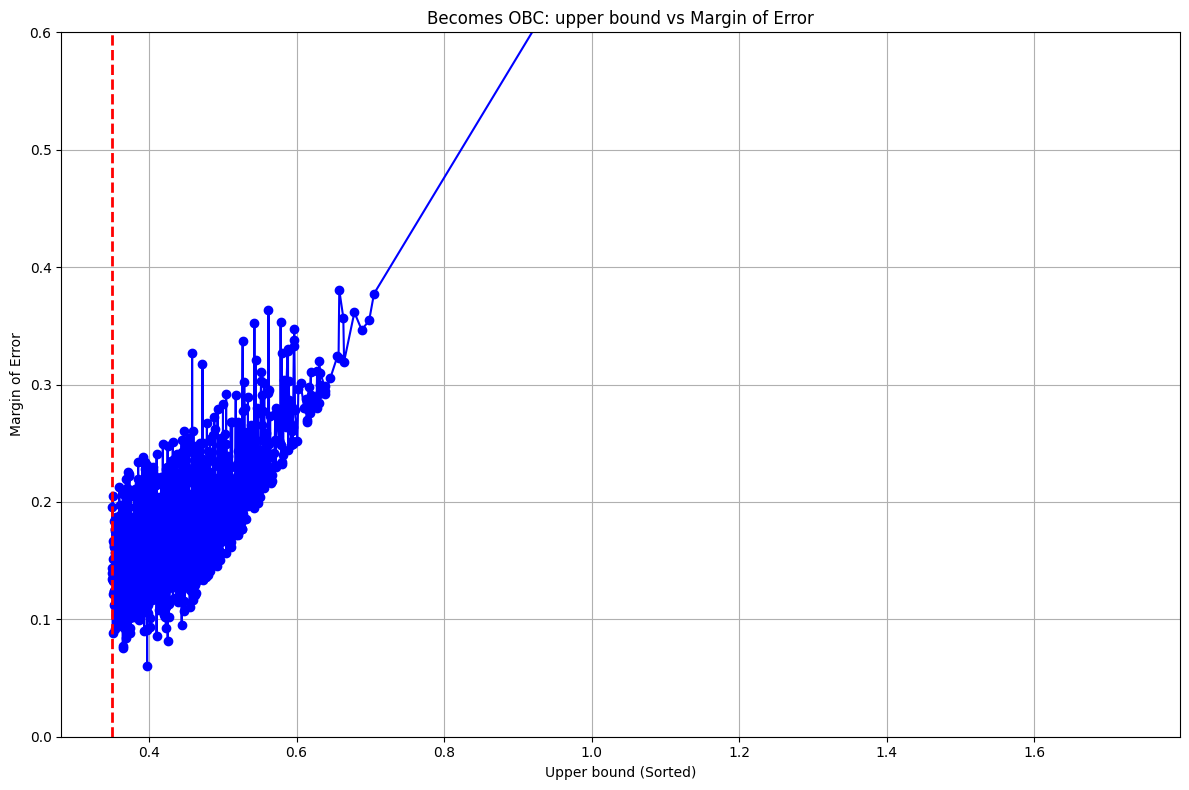

In [16]:
# plot low-income percent on the x-axis (least to greatest) and MOE on the y axis
import pandas as pd
import matplotlib.pyplot as plt

#Define input file path
input_file = 'designation_3_data.csv'
input_csv_file = f'{ipath}/{input_file}'

# Step 1: Load the CSV data
data = pd.read_csv(input_csv_file)

# Step 2: Sort by Inverse Percent from least to greatest
data_sorted = data.sort_values(by='Upper bound')

# Step 3: Plotting
plt.figure(figsize=(12, 8))
plt.plot(data_sorted['Upper bound'], data_sorted['Margin of Error'], marker='o', linestyle='-', color='b')
plt.xlabel('Upper bound (Sorted)')
plt.ylabel('Margin of Error')

# Label title by block group class
plt.title('Becomes OBC: upper bound vs Margin of Error')
plt.grid(True)

plt.ylim(0, 0.6)

#mark 35% threshhold
plt.axvline(x=0.35, color='red', linestyle='--', linewidth=2)
plt.tight_layout()

# Show the plot
plt.show()

Plot designation 4: Becomes non-OBC

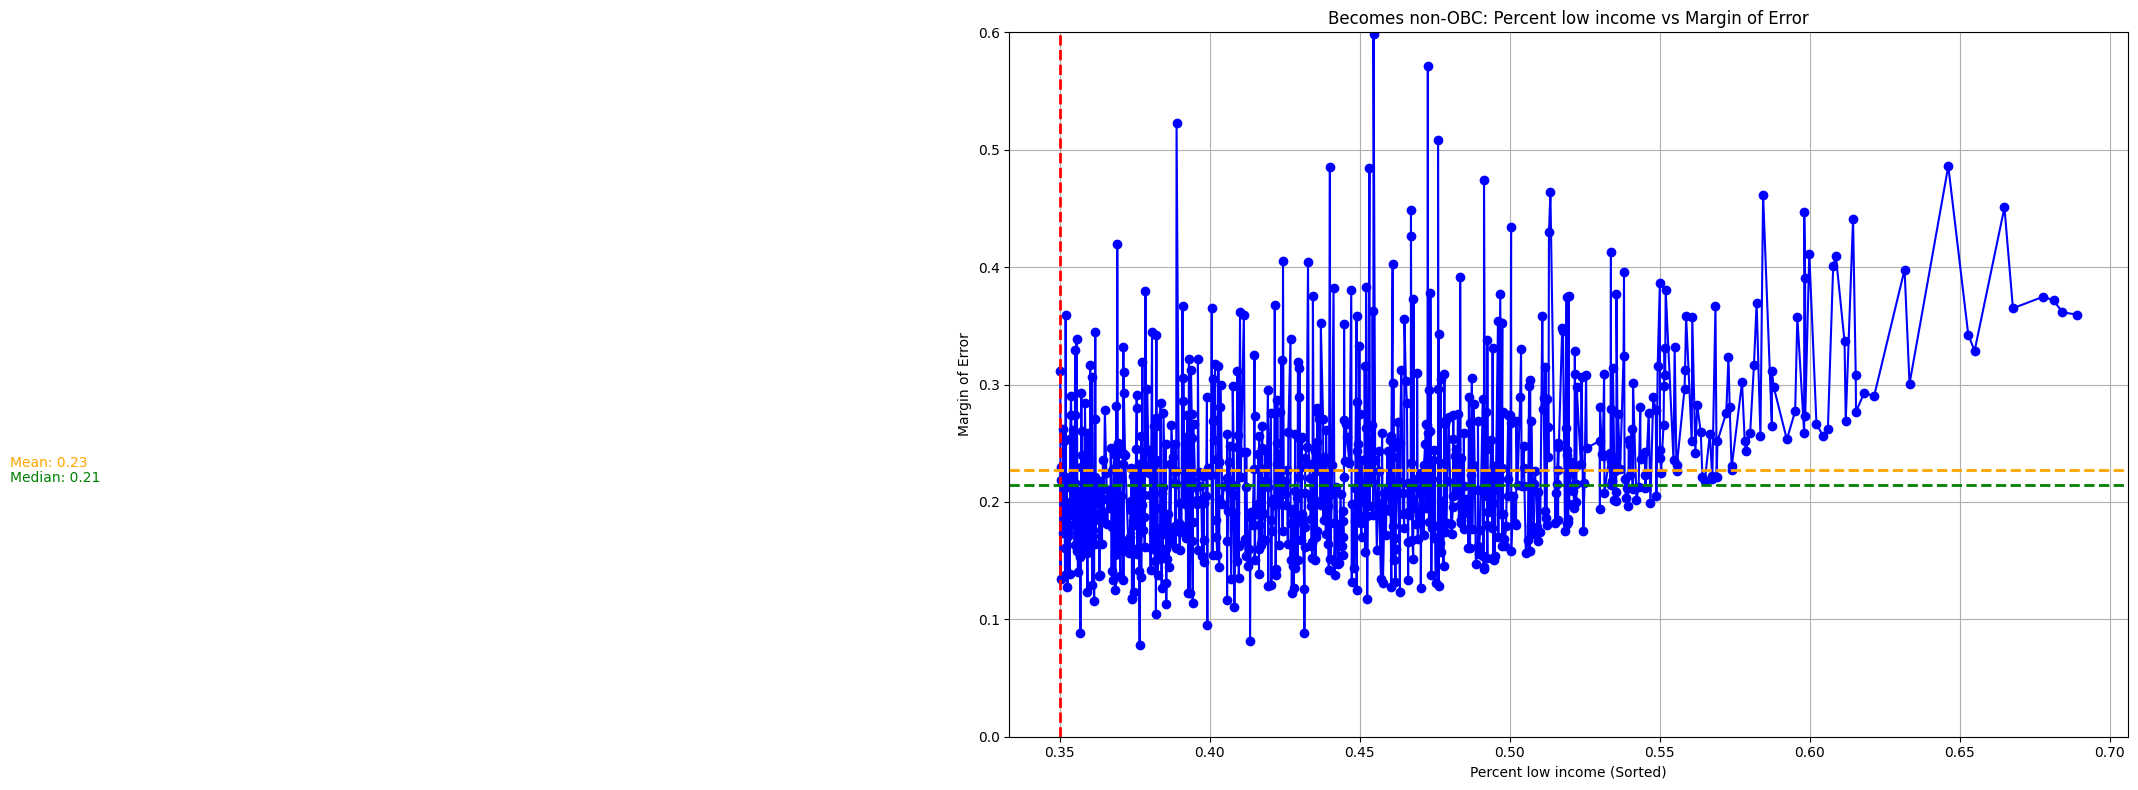

In [38]:
# plot low-income percent on the x-axis (least to greatest) and MOE on the y axis
import pandas as pd
import matplotlib.pyplot as plt

#Define input file path
input_file = 'designation_4_data.csv'
input_csv_file = f'{ipath}/{input_file}'

# Step 1: Load the CSV data
data = pd.read_csv(input_csv_file)

# Step 2: Sort by Inverse Percent from least to greatest
data_sorted = data.sort_values(by='Percent low income')

# Step 3: Plotting
plt.figure(figsize=(12, 8))
plt.plot(data_sorted['Percent low income'], data_sorted['Margin of Error'], marker='o', linestyle='-', color='b')
plt.xlabel('Percent low income (Sorted)')
plt.ylabel('Margin of Error')

# Label title by block group class
plt.title('Becomes non-OBC: Percent low income vs Margin of Error')
plt.grid(True)

plt.ylim(0, 0.6)

#mark 35% threshhold
plt.axvline(x=0.35, color='red', linestyle='--', linewidth=2)
plt.tight_layout()

# Calculate the median and mean of the Margin of Error
median_moe = data_sorted['Margin of Error'].median()
mean_moe = data_sorted['Margin of Error'].mean()

# Add horizontal lines for median and mean
plt.axhline(y=median_moe, color='green', linestyle='--', linewidth=2, label=f'Median MOE: {median_moe:.2f}')
plt.axhline(y=mean_moe, color='orange', linestyle='--', linewidth=2, label=f'Mean MOE: {mean_moe:.2f}')

# Annotate the median and mean lines on the y-axis
plt.text(x=0, y=median_moe, s=f'Median: {median_moe:.2f}', color='green', verticalalignment='bottom')
plt.text(x=0, y=mean_moe, s=f'Mean: {mean_moe:.2f}', color='orange', verticalalignment='bottom')

# Show the plot
plt.show()

Plot designation 4 again but with lower bound

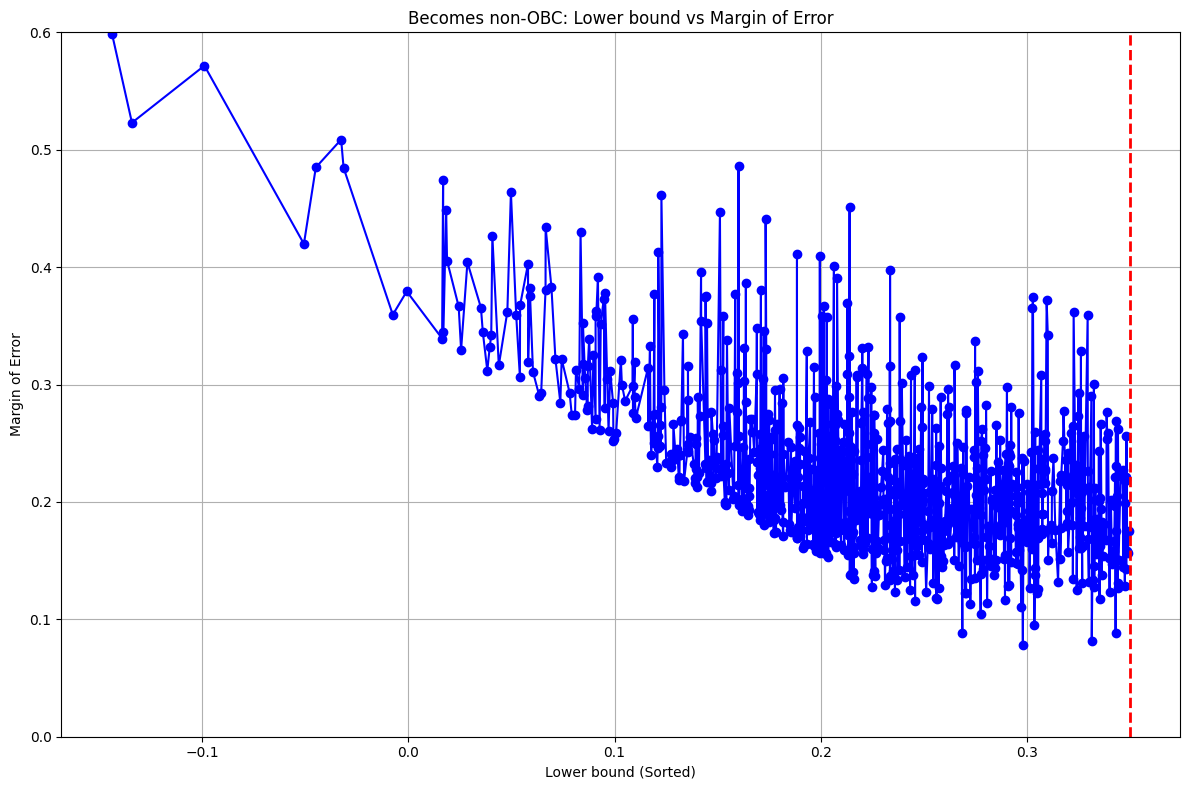

In [18]:
# plot low-income percent on the x-axis (least to greatest) and MOE on the y axis
import pandas as pd
import matplotlib.pyplot as plt

#Define input file path
input_file = 'designation_4_data.csv'
input_csv_file = f'{ipath}/{input_file}'

# Step 1: Load the CSV data
data = pd.read_csv(input_csv_file)  

# Step 2: Sort by Inverse Percent from least to greatest
data_sorted = data.sort_values(by='Lower bound')

# Step 3: Plotting
plt.figure(figsize=(12, 8))
plt.plot(data_sorted['Lower bound'], data_sorted['Margin of Error'], marker='o', linestyle='-', color='b')
plt.xlabel('Lower bound (Sorted)')
plt.ylabel('Margin of Error')

# Label title by block group class
plt.title('Becomes non-OBC: Lower bound vs Margin of Error')
plt.grid(True)

plt.ylim(0, 0.6)

#mark 35% threshhold
plt.axvline(x=0.35, color='red', linestyle='--', linewidth=2)
plt.tight_layout()

# Show the plot
plt.show()